In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [9]:
data = pd.read_excel('data.xlsx', index_col='순번')
data.head()

,Nor_H,Nor_S,Nor_V,Nor_R,Nor_G,Nor_B,Nor_l,Nor_a,Nor_b,계절,봄,여름,가을,겨울,쿨웜,Unnamed: 16
순번,,,,,,,,,,,,,,,,
1,0.016760,0.101010,0.927536,0.936170,0.842697,0.864253,0.885714,0.454545,0.433824,1,1,0,0,0,1,NaN
2,0.986034,0.494949,0.942029,0.952128,0.359551,0.538462,0.585714,0.838384,0.514706,1,1,0,0,0,1,NaN
3,0.027933,0.646465,0.942029,0.952128,0.331461,0.343891,0.571429,0.838384,0.683824,1,1,0,0,0,1,NaN
4,0.000000,0.646465,0.898551,0.909574,0.179775,0.330317,0.485714,0.929293,0.639706,1,1,0,0,0,1,NaN
5,0.097765,0.787879,0.913043,0.914894,0.556180,0.199095,0.671429,0.595960,0.845588,1,1,0,0,0,1,NaN


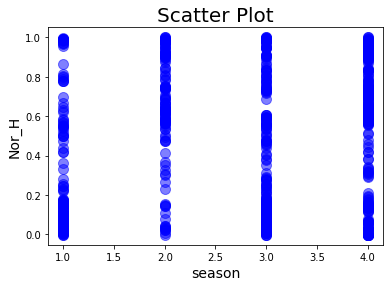

In [25]:
plt.plot('계절',  # x
         'Nor_H',  # y
         data=data, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('season', fontsize=14)

plt.ylabel('Nor_H', fontsize=14)

plt.show()

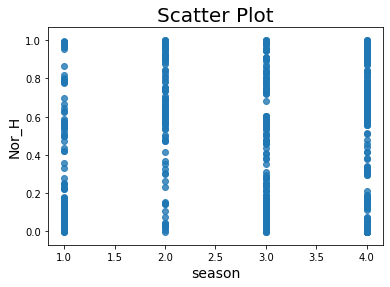

In [24]:
sns.regplot(x=data['계절'], 
           y=data['Nor_H'], 
           fit_reg=False) # no regression line

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('season', fontsize=14)

plt.ylabel('Nor_H', fontsize=14)

plt.show()


### 로지스틱회귀분석

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
x_data = data[['Nor_H', 'Nor_S', 'Nor_V']]
y_data = data['쿨웜']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=777)

model = LogisticRegression()

model.fit(x_train, y_train)


print(model.score(x_test, y_test))

0.7222222222222222


In [67]:
x_data = data[['Nor_H', 'Nor_S', 'Nor_V','Nor_R', 'Nor_G', 'Nor_B','Nor_l', 'Nor_a', 'Nor_b']]

y_data = data['가을']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

0.6759259259259259


In [57]:
x_data = data[['Nor_l', 'Nor_a', 'Nor_b']]
y_data = data['겨울']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

0.6759259259259259


In [ ]:
x_data = data[['Nor_R', 'Nor_G', 'Nor_B']]
y_data = data['겨울']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_med = sm.Logit.from_formula("쿨웜 ~ Nor_H + Nor_S + Nor_V", data)
result_med = model_med.fit()
result_med.summary()

Optimization terminated successfully.
         Current function value: 0.584660
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     쿨웜   No. Observations:                  719
Model:                          Logit   Df Residuals:                      715
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.1565
Time:                        09:25:44   Log-Likelihood:                -420.37
converged:                       True   LL-Null:                       -498.37
Covariance Type:            nonrobust   LLR p-value:                 1.343e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0580      0.253      0.229      0.819      -0.438       0.554
Nor_H         -2.3843      0.248     -9.598      0.000      -2.871      -1.897
Nor_S          2.2869      0.328      6.971      0.000       1.644       2.930
Nor_V          0.1190      0.237      0.503      0.615      -0.345       0.583
==============================================================================
"""

### 다중 회귀 분석

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
model = smf.ols(formula = '쿨웜 ~ Nor_H + Nor_S + Nor_V', data = data)
                        # 종속변수 ~ 독립변수
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     쿨웜   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     59.80
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.67e-34
Time:                        14:20:12   Log-Likelihood:                -441.35
No. Observations:                 719   AIC:                             890.7
Df Residuals:                     715   BIC:                             909.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5259      0.052     10.047      0.000       0.423       0.629
Nor_H         -0.5149      0.048    -10.768      0.000      -0.609      -0.421
Nor_S          0.4672      0.063      7.458      0.000       0.344       0.590
Nor_V          0.0185      0.047      0.395      0.693      -0.073       0.110
==============================================================================
Omnibus:                      343.758   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.456
Skew:                           0.011   Prob(JB):                     2.71e-09
Kurtosis:                       1.853   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Prob(F-statistic)
# 회귀모형에 대한 (통계적) 유의미성 검증 결과. 유의미함 (p < 0.05)
# 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

# 회귀계수(Coefficients)
# Z = 0.5259 + -0.5149*(Nor_H) + 0.4672*(Nor_S) + 0.0185*(Nor_V)

# Adj. R-squared
# 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정

# P(>|t|)는 모집단에서 계수가 0일 때, 
# 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값. 
# 이 확률이 매우 작다는 것은, 모집단에서 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미한다. 
# 보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 한다.